## Leitura e Preprocessamento dos Dados

### Requirements

In [48]:
import pandas as pd
import numpy as np
import os
import glob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns



nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Leitura e Concatenação 

In [2]:
path = os.getcwd()
files = glob.glob(os.path.join(path, "output/*/*.json"))

In [3]:
jsons = [pd.read_json(file, lines=True) for file in files]
df = pd.concat(jsons, ignore_index=True)

df["subject"] = [os.path.split(os.path.dirname(file))[-1] for file in files]

In [4]:
df

,title,abstract,subject
0,Modelagem de reforma catalítica seca de metano...,Estamos vivenciando o início da Era da Informa...,machinelearning
1,Aplicação de machine learning para apostas esp...,As práticas esportivas surgiram de atividades ...,machinelearning
2,Social machines: a unified paradigm to describ...,"The open, distributed approach of the Web and ...",machinelearning
3,Um método de aprendizagem seqüencial com filtr...,"Em aplicações de aprendizagem de máquina, é co...",machinelearning
4,Development of machine and deep learning based...,Artificial intelligence-based algorithms have ...,machinelearning
5,Automação de controle de acesso por reconhecim...,Esta pesquisa tem como objetivo propor um méto...,machinelearning
6,Visão computacional aplicada a gestão da manut...,O desgaste progressivo de peças rotativas como...,machinelearning
7,A machine learning-based methodology for autom...,Oil refineries process hazardous substances at...,machinelearning
8,Time Aware Sigmoid Optimization : a new learni...,The correct choice of hyperparameters for the ...,machinelearning
9,Time series forecasting with deep forest regre...,A time series is a collection of ordered obser...,machinelearning


In [5]:
df.describe()

,title,abstract,subject
count,30,30,30
unique,30,30,3
top,Modelagem de reforma catalítica seca de metano...,Estamos vivenciando o início da Era da Informa...,machinelearning
freq,1,1,10


### Stopwords

English and portuguese

In [6]:
languages = ['english', 'portuguese']

In [7]:
list_stop = stopwords.words(languages)
print(list_stop[:10])
print(list_stop[-10:])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['tivessem', 'tivéssemos', 'tu', 'tua', 'tuas', 'um', 'uma', 'você', 'vocês', 'vos']


### Construção do vocabulário e preprocessamento dos documentos

In [8]:
documents = df["abstract"].copy()

documents_tokens = []
vocabulary = set()

for document in documents:
    document_lower = document.lower()  # transforma todos as frases em minusculo
   
    for language in languages: # para cada linguagem executa o list comprehension abaixo:
        token_list = [
            token for token in word_tokenize(document_lower, language=language) if token.isalnum() and token not in list_stop
        ] # quebra as frases em tokens, verifica se não está no stoplist, verifica se é alfanumerico. Caso sim, adiciona a lista de tokens
        
        if token_list not in documents_tokens:
            documents_tokens.append(token_list) #se a lista de tokens não constar na lista de frases, é adicionada
            
        for token in token_list:
            if token not in vocabulary and token.isalnum(): # se o token não já constar no vocabulario, adiciona no vocabulario
                vocabulary.add(token)

In [9]:
len(vocabulary) #Tamanho do vocabulario 

2045

In [10]:
len(documents_tokens) #Tamanho da lista de frases

30

In [11]:
print([v for v in vocabulary if len(v) == 1]) #Tokens indesejados

['k', '7', 'á', '3', 'b', '2', '5', 'f', '1']


In [12]:
#Untokenized documents list

preprocessed_documents = []

for document in documents_tokens:
    preprocessed_documents.append(TreebankWordDetokenizer().detokenize(document))
    
print(len(preprocessed_documents))
print(preprocessed_documents[0])

30
vivenciando início informação onde enormes quantidades dados geradas cada instante principalmente decorrência rápida modernização desenvolvimento tecnológico têm acontecido diversos setores sociedade âmbito indústrias presenciando desenrolar 4ª revolução industrial indústria fortemente marcada automação inteligência artificial big data revolução novas tecnologias trazidas podem trazer grandes melhorias indústria modificando relações trabalho aumentando significativamente eficiência segurança qualidade processos industriais tecnologias trazem grande impacto diversas áreas campo inteligência artificial conjunto recursos computacionais podem usados modelar resolver problemas alta complexidade utilizando menos recursos métodos tradicionais indústria química inteligências artificiais podem usadas exemplo modelagem processos complexos contenham grande número variáveis associadas tornando difícil desenvolver modelos fenomenológicos robustos precisos suficiente prever processos exemplo proc

### Utilizando Sklearn

In [30]:
count_vect = CountVectorizer(stop_words=languages, min_df=0.005, max_df=0.5, max_features=50)
count_vect.fit(preprocessed_documents)

CountVectorizer(max_df=0.5, max_features=50, min_df=0.005,
                stop_words=['english', 'portuguese'])

In [31]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  50
Quantidade total de palavras:  1225


In [32]:
sorted(count_vect.vocabulary_.items(), reverse=True)[:10]

[('training', 49),
 ('tema', 48),
 ('social', 47),
 ('sobre', 46),
 ('series', 45),
 ('resultados', 44),
 ('relação', 43),
 ('recife', 42),
 ('proposto', 41),
 ('produção', 40)]

### Extração de caracteristicas TF-IDF

In [33]:
X = count_vect.transform(preprocessed_documents)

In [34]:
X

<30x50 sparse matrix of type '<class 'numpy.int64'>'
	with 320 stored elements in Compressed Sparse Row format>

In [35]:
X.shape

(30, 50)

In [36]:
print(X[0,:])

  (0, 0)	1
  (0, 9)	2
  (0, 12)	1
  (0, 13)	3
  (0, 14)	2
  (0, 21)	3
  (0, 22)	2
  (0, 23)	2
  (0, 25)	2
  (0, 29)	6
  (0, 32)	3
  (0, 34)	1
  (0, 38)	1
  (0, 39)	6
  (0, 40)	3
  (0, 44)	1


In [37]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X)

TfidfTransformer()

In [38]:
X_tfidf = tfidf_transformer.transform(X)
print(X_tfidf[0,:])

  (0, 44)	0.06372897349820349
  (0, 40)	0.19118692049461045
  (0, 39)	0.5983667327831607
  (0, 38)	0.07439356275013151
  (0, 34)	0.0668792554060211
  (0, 32)	0.22318068825039453
  (0, 29)	0.5983667327831607
  (0, 25)	0.1337585108120422
  (0, 23)	0.12745794699640697
  (0, 22)	0.1689081811517593
  (0, 21)	0.22318068825039453
  (0, 14)	0.12175839373978613
  (0, 13)	0.18263759060967918
  (0, 12)	0.07439356275013151
  (0, 9)	0.11655510928368225
  (0, 0)	0.060879196869893064


In [39]:
X_tfidf

<30x50 sparse matrix of type '<class 'numpy.float64'>'
	with 320 stored elements in Compressed Sparse Row format>

In [40]:
X_tfidf.shape

(30, 50)

### Análise das Caracteristicas textuais

In [42]:
sorted_X_indices = np.argsort(X.toarray(), axis=1)[:, ::-1]
sorted_Xtfidf_indices = np.argsort(X_tfidf.toarray(), axis=1)[:,::-1]

print('Termos mais comuns nos 10 primeiros documentos:')
for i in range(30):
    print(count_vect.get_feature_names_out()[sorted_X_indices[i, :3]])

print('\nTermos mais relevantes nos 10 primeiros documentos:')
for i in range(30):
    print(count_vect.get_feature_names_out()[sorted_Xtfidf_indices[i, :3]])

print('\nTermos mais relevantes na base de dados:')
mean_Xtfidf = X_tfidf.mean(axis=0)
sorted_meanXtfidf_indices = np.argsort(mean_Xtfidf)[::-1]
print(count_vect.get_feature_names_out()[sorted_meanXtfidf_indices[:3]])

Termos mais comuns nos 10 primeiros documentos:
['modelos' 'processos' 'grande']
['dados' 'resultados' 'brasil']
['social' 'machines' 'different']
['método' 'learning' 'machine']
['learning' 'machine' 'machines']
['através' 'método' 'objetivo']
['meio' 'learning' 'machine']
['learning' 'machine' 'machines']
['training' 'performance' 'different']
['series' 'performance' 'learning']
['economia' 'produção' 'resultados']
['modelos' 'desenvolvimento' 'economia']
['analisar' 'sobre' 'estudo']
['mercado' 'atividade' 'estudo']
['economia' 'analisar' 'pernambuco']
['economia' 'movimento' 'através']
['tema' 'economia' 'campo']
['local' 'desenvolvimento' 'economia']
['brasileira' 'estudo' 'relação']
['economia' 'resultados' 'brasileira']
['design' 'análise' 'relação']
['arte' 'industrial' 'desenvolvimento']
['movimento' 'design' 'elementos']
['arquitetura' 'artes' 'além']
['elementos' 'arquitetura' 'arte']
['design' 'arte' 'sobre']
['industrial' 'brasil' 'tema']
['design' 'campo' 'além']
['design

### Text Clustering

In [47]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.sort_values(by=list(X_tfidf_df.columns), inplace=True)

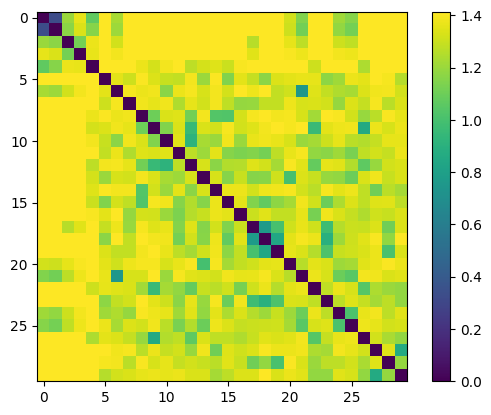

In [74]:
p = pairwise_distances(X_tfidf_df, metric='euclidean')
plt.imshow(p, interpolation='nearest')
plt.colorbar()